# Machine Learning : HW2

In [1]:
# Imports
import numpy as np
from skeleton_code import *
from math import log

## Linear Regression

In [2]:
# Load data
X_train, y_train, X_test, y_test = load_data()
X_test.shape

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


(100, 49)

In [3]:
# Check loss, gradient functions
theta_x = np.zeros(X_train.shape[1])
theta_x.shape
generic_gradient_checker(X_train, y_train, theta_x, compute_square_loss, compute_square_loss_gradient)

True

### Batch Gradient Descent Evaluation (Q12)

/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:57: RuntimeWarning: overflow encountered in double_scalars
  loss = sum((h - y) ** 2) / X.shape[0]
/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:57: RuntimeWarning: overflow encountered in square
  loss = sum((h - y) ** 2) / X.shape[0]
/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:77: RuntimeWarning: overflow encountered in multiply
  grad = 2 * (X.T @ (h - y)) / X.shape[0]
/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:76: RuntimeWarning: invalid value encountered in matmul
  h = X @ theta
/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:77: RuntimeWarning: invalid value encountered in matmul
  grad = 2 * (X.T @ (h - y)) / X.shape[0]
/Users/sarthak/Repos/MS-CS/Courses/Machine Learning DS-GA.1003/hw2/skeleton_code.py:56: RuntimeWarning: invalid value encount

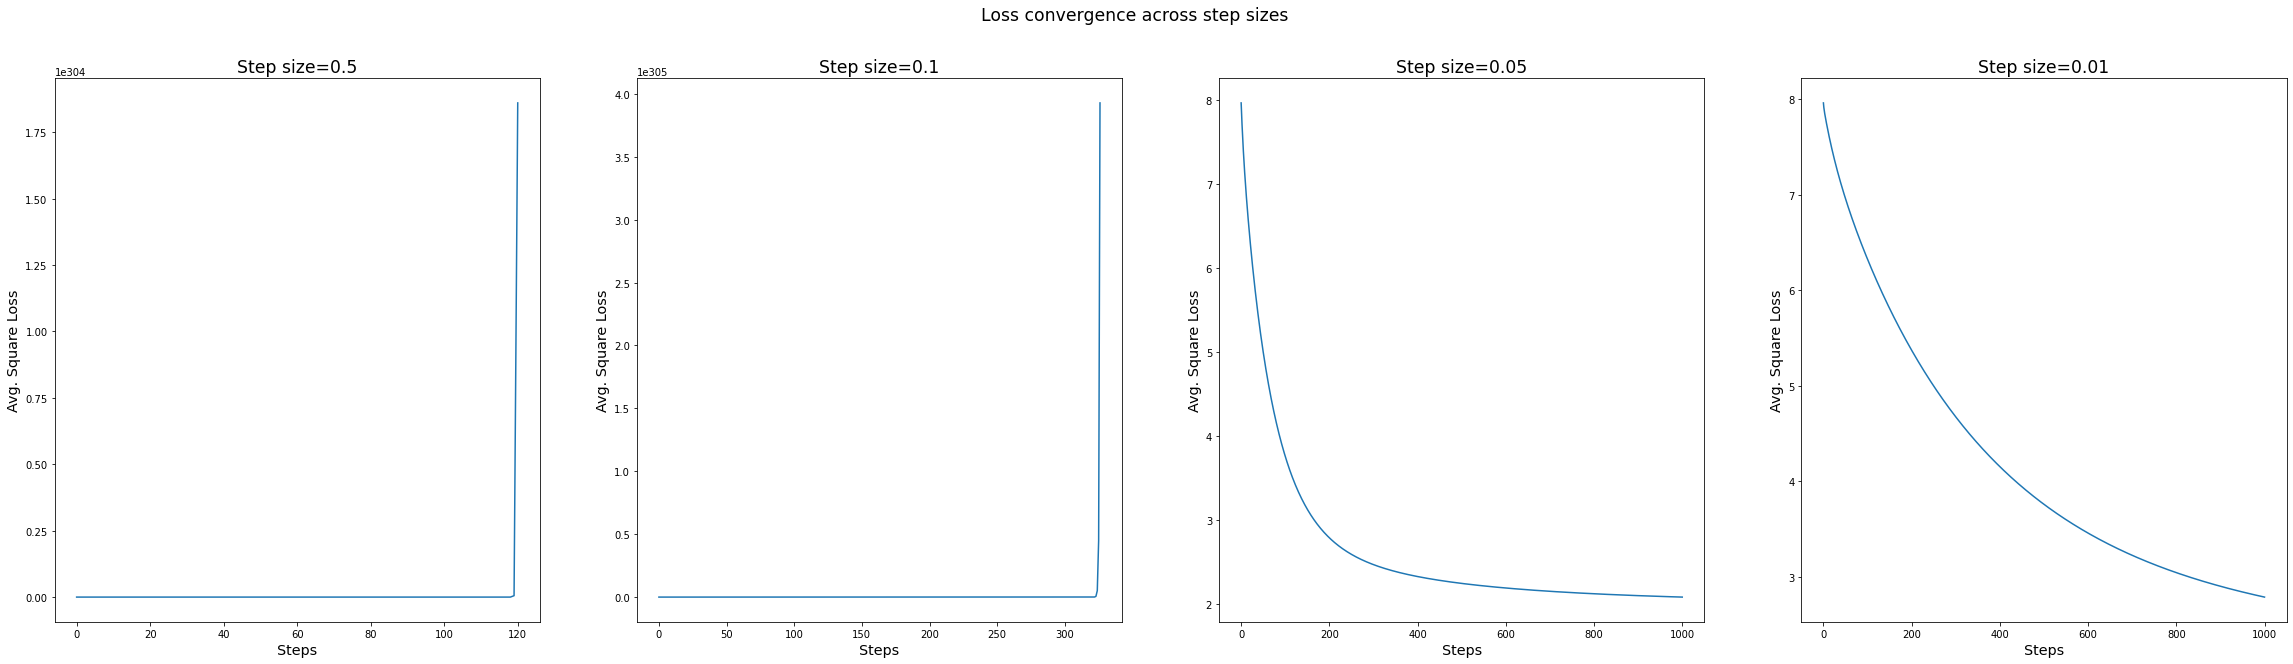

In [4]:
# Evaluate the optimal step size
step_sizes = [0.5, 0.1, 0.05, 0.01]

# Configure plot figure
fig, axs = plt.subplots(1, len(step_sizes))
fig.set_figheight(10)
fig.set_figwidth(40)
fig.suptitle("Loss convergence across step sizes", fontsize="xx-large")

for i, size in enumerate(step_sizes):
    _, loss_hist = batch_grad_descent(X_train, y_train, alpha=size, num_step=1000, grad_check=True)
    axs[i].plot(np.arange(1001), loss_hist)
    axs[i].set_xlabel("Steps", fontsize="x-large")
    axs[i].set_ylabel("Avg. Square Loss", fontsize="x-large")
    axs[i].set_title(f"Step size={size}", fontsize="xx-large")
    
optimal_step_size = 0.05

fig.savefig("plot_12.pdf")
fig.show()

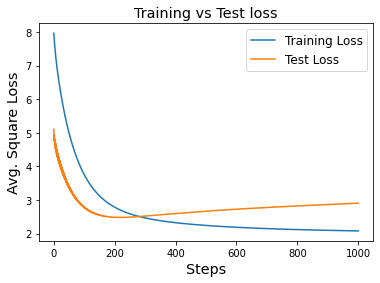

In [5]:
# Evaluate the optimal number of steps
steps = 1000
theta_hist, train_loss_hist = batch_grad_descent(X_train, y_train, alpha=optimal_step_size, num_step=steps, grad_check=True)
test_loss_hist = [compute_square_loss(X_test, y_test, w) for w in theta_hist]
plt.plot(np.arange(steps + 1), train_loss_hist, label="Training Loss")
plt.plot(np.arange(steps + 1), test_loss_hist, label="Test Loss")
plt.xlabel("Steps", fontsize="x-large")
plt.ylabel("Avg. Square Loss", fontsize="x-large")
plt.legend(loc="upper right", fontsize="large")
plt.title(f"Training vs Test loss", fontsize="x-large")
plt.savefig("plot_13.pdf")
plt.show()

## Ridge Regression
### Effects of Regularization (Q17)

/var/folders/sf/dnhwpw5j4gdfml0m9b2sgyb00000gn/T/ipykernel_38471/3181210870.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


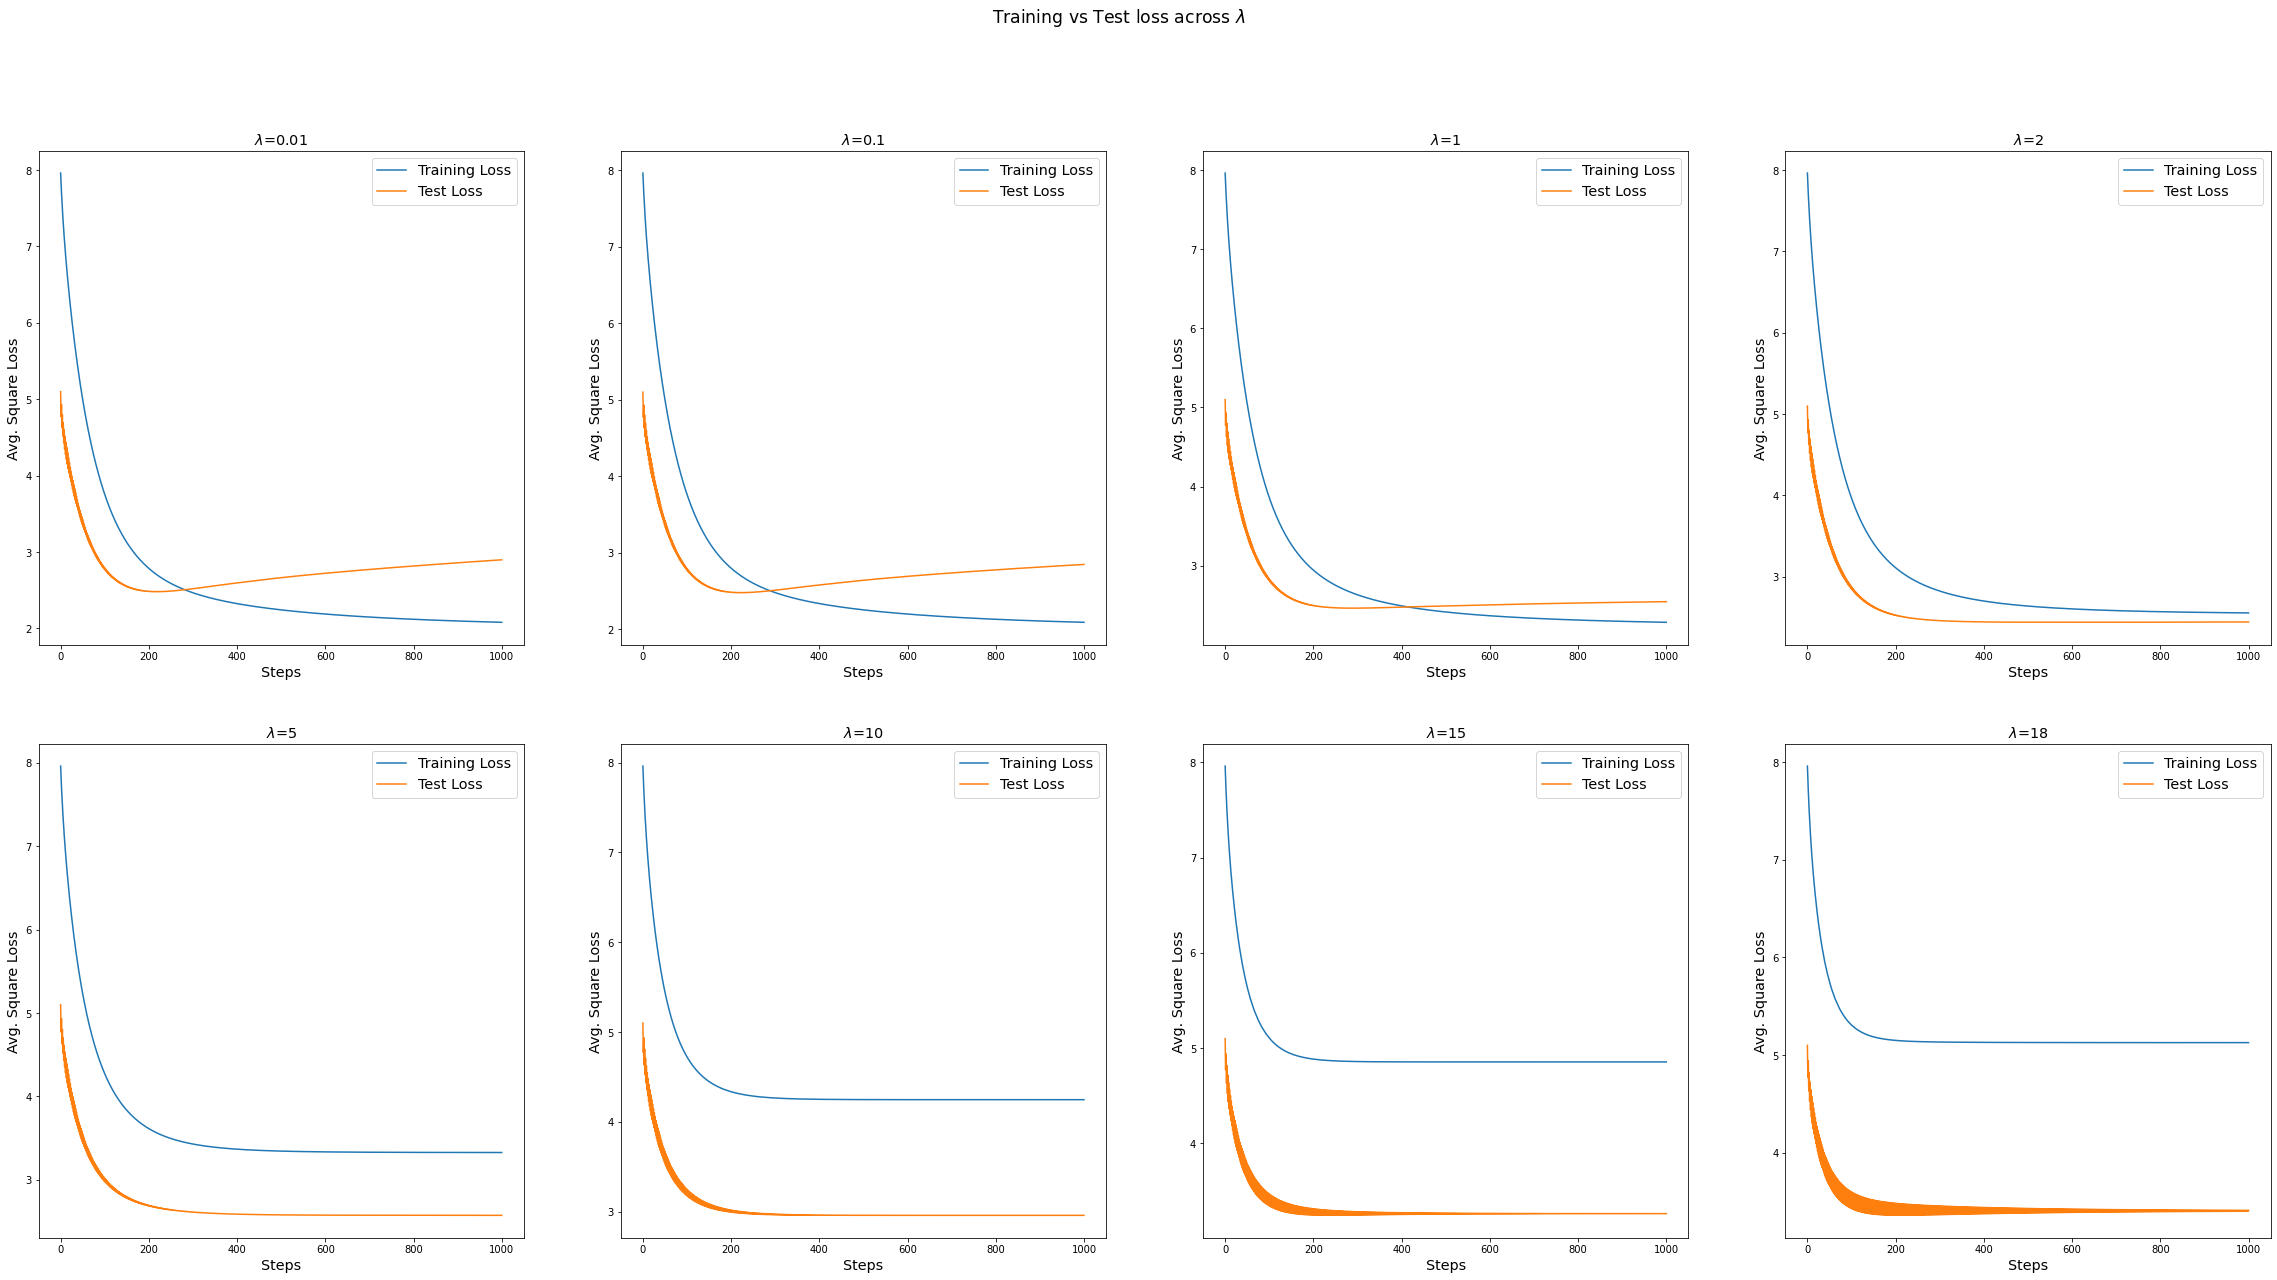

In [6]:
# Evaluate the optimal regularization coefficient value
step_size, steps, lambda_list = optimal_step_size, 1000, [10**-2, 10**-1, 1, 2, 5, 10, 15, 18]
final_training_loss, final_test_loss, min_test_loss = [], [], []
fig, axes = plt.subplots(2, 4)
fig.set_figheight(20)
fig.set_figwidth(40)
fig.suptitle("Training vs Test loss across $\lambda$", fontsize="xx-large")
for i, lambda_val in enumerate(lambda_list):
    # Compute losses
    theta_hist, train_loss_hist = regularized_grad_descent(X_train, y_train, alpha=step_size, lambda_reg=lambda_val, num_step=steps)
    test_loss_hist = [compute_square_loss(X_test, y_test, w) for w in theta_hist]
    final_training_loss.append(train_loss_hist[-1])
    final_test_loss.append(test_loss_hist[-1])
    min_test_loss.append(min(test_loss_hist))
    
    # Plot
    axes[i // 4][i % 4].plot(np.arange(steps + 1), train_loss_hist, label="Training Loss")
    axes[i // 4][i % 4].plot(np.arange(steps + 1), test_loss_hist, label="Test Loss")
    axes[i // 4][i % 4].set_xlabel("Steps", fontsize="x-large")
    axes[i // 4][i % 4].set_ylabel("Avg. Square Loss", fontsize="x-large")
    axes[i // 4][i % 4].legend(loc="upper right", fontsize="x-large")
    axes[i // 4][i % 4].set_title(f"$\lambda$={lambda_val}", fontsize="x-large")

fig.savefig("plot_17.pdf")
fig.show()

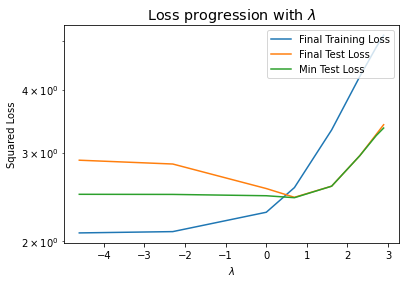

In [14]:
# Plot loss progression with lambda
log_lambdas = list(map(log, lambda_list))
plt.plot(log_lambdas, final_training_loss, label="Final Training Loss", scaley=True)
plt.plot(log_lambdas, final_test_loss, label="Final Test Loss", scaley=True)
plt.plot(log_lambdas, min_test_loss, label="Min Test Loss")
plt.ylabel("Squared Loss")
plt.yscale("log")
plt.xlabel("$\lambda$")
plt.title("Loss progression with $\lambda$", fontsize="x-large")
plt.legend(loc="upper right", fontsize="medium")
plt.savefig("plot_19.pdf")
plt.show()

## Logistic Regression

In [8]:
from mnist_classification_source_code import *
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X_train, X_test, y_train, y_test = pre_process_mnist_01()

/var/folders/sf/dnhwpw5j4gdfml0m9b2sgyb00000gn/T/ipykernel_38471/3474201628.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


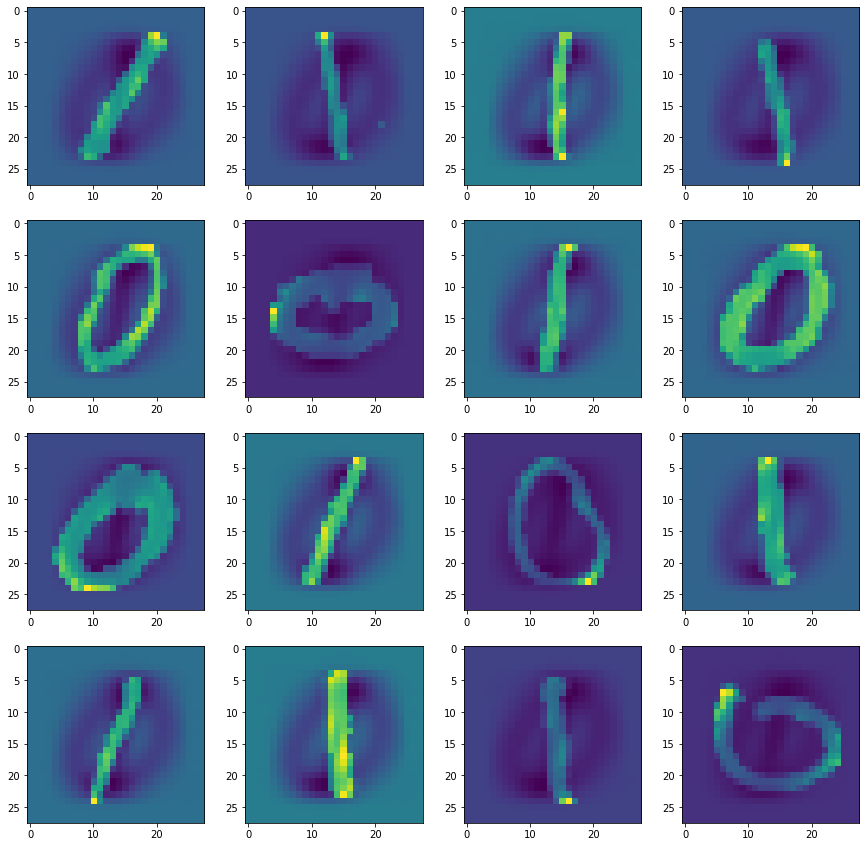

In [10]:
# Visualize
rows, cols = 4, 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
x = X_train[np.random.choice(X_train.shape[0], rows*cols), :]
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(x[4*i + j].reshape(28,28))

fig.show()

In [11]:
# Subsample
N_train = 100
X_sample, y_sample = sub_sample(N_train, X_train, y_train)

### Evaluation

-- Epoch 1
Norm: 0.60, NNZs: 448, Bias: -0.006387, T: 9902, Avg. loss: 0.030175
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.65, NNZs: 440, Bias: -0.008956, T: 19804, Avg. loss: 0.018011
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 435, Bias: -0.010714, T: 29706, Avg. loss: 0.015460
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 427, Bias: -0.012097, T: 39608, Avg. loss: 0.014081
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.73, NNZs: 427, Bias: -0.013230, T: 49510, Avg. loss: 0.013150
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.75, NNZs: 419, Bias: -0.014198, T: 59412, Avg. loss: 0.012469
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.76, NNZs: 410, Bias: -0.015048, T: 69314, Avg. loss: 0.011949
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 407, Bias: -0.015804, T: 79216, Avg. loss: 0.011526
Total training time: 0.20 seconds.
-- Epoch 9
Norm: 0.78, NNZs: 405, Bias: -0.016485, T: 89118, Avg. loss: 0

Norm: 0.61, NNZs: 447, Bias: 0.010250, T: 9902, Avg. loss: 0.029962
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 435, Bias: 0.008001, T: 19804, Avg. loss: 0.017766
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 425, Bias: 0.006395, T: 29706, Avg. loss: 0.015276
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 418, Bias: 0.005128, T: 39608, Avg. loss: 0.013930
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 0.74, NNZs: 408, Bias: 0.004069, T: 49510, Avg. loss: 0.013038
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 0.75, NNZs: 403, Bias: 0.003153, T: 59412, Avg. loss: 0.012381
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 0.77, NNZs: 404, Bias: 0.002346, T: 69314, Avg. loss: 0.011875
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 0.78, NNZs: 402, Bias: 0.001623, T: 79216, Avg. loss: 0.011461
Total training time: 0.30 seconds.
-- Epoch 9
Norm: 0.79, NNZs: 399, Bias: 0.000967, T: 89118, Avg. loss: 0.011125
Total traini

Norm: 0.67, NNZs: 405, Bias: 0.002852, T: 19804, Avg. loss: 0.018321
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 395, Bias: 0.001431, T: 29706, Avg. loss: 0.015953
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.73, NNZs: 390, Bias: 0.000304, T: 39608, Avg. loss: 0.014670
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.75, NNZs: 387, Bias: -0.000630, T: 49510, Avg. loss: 0.013844
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.77, NNZs: 380, Bias: -0.001435, T: 59412, Avg. loss: 0.013217
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 0.78, NNZs: 378, Bias: -0.002138, T: 69314, Avg. loss: 0.012744
Total training time: 0.25 seconds.
-- Epoch 8
Norm: 0.80, NNZs: 375, Bias: -0.002769, T: 79216, Avg. loss: 0.012360
Total training time: 0.28 seconds.
-- Epoch 9
Norm: 0.81, NNZs: 369, Bias: -0.003341, T: 89118, Avg. loss: 0.012049
Total training time: 0.31 seconds.
Convergence after 9 epochs took 0.31 seconds
-- Epoch 1
Norm: 0.65, NNZs: 425, Bias: 0

Norm: 0.85, NNZs: 316, Bias: -0.001656, T: 89118, Avg. loss: 0.013847
Total training time: 0.32 seconds.
Convergence after 9 epochs took 0.32 seconds
-- Epoch 1
Norm: 0.78, NNZs: 404, Bias: 0.012686, T: 9902, Avg. loss: 0.032001
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 389, Bias: 0.010218, T: 19804, Avg. loss: 0.020178
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 377, Bias: 0.008587, T: 29706, Avg. loss: 0.017807
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 369, Bias: 0.007368, T: 39608, Avg. loss: 0.016533
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.91, NNZs: 353, Bias: 0.006396, T: 49510, Avg. loss: 0.015711
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.93, NNZs: 342, Bias: 0.005576, T: 59412, Avg. loss: 0.015107
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 0.94, NNZs: 337, Bias: 0.004873, T: 69314, Avg. loss: 0.014658
Total training time: 0.26 seconds.
-- Epoch 8
Norm: 0.96, NNZs: 335, Bias: 0.0042

Norm: 0.90, NNZs: 269, Bias: -0.002843, T: 89118, Avg. loss: 0.017624
Total training time: 0.32 seconds.
Convergence after 9 epochs took 0.32 seconds
-- Epoch 1
Norm: 0.64, NNZs: 340, Bias: -0.006858, T: 9902, Avg. loss: 0.034458
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 322, Bias: -0.008770, T: 19804, Avg. loss: 0.023066
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.75, NNZs: 310, Bias: -0.009996, T: 29706, Avg. loss: 0.020981
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 294, Bias: -0.010855, T: 39608, Avg. loss: 0.019844
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 286, Bias: -0.011514, T: 49510, Avg. loss: 0.019110
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 282, Bias: -0.012040, T: 59412, Avg. loss: 0.018584
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 0.86, NNZs: 279, Bias: -0.012473, T: 69314, Avg. loss: 0.018208
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 0.88, NNZs: 275, Bias:

Norm: 0.82, NNZs: 295, Bias: -0.003351, T: 49510, Avg. loss: 0.019083
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.85, NNZs: 289, Bias: -0.003803, T: 59412, Avg. loss: 0.018554
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 0.87, NNZs: 282, Bias: -0.004165, T: 69314, Avg. loss: 0.018156
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 0.89, NNZs: 280, Bias: -0.004456, T: 79216, Avg. loss: 0.017840
Total training time: 0.29 seconds.
-- Epoch 9
Norm: 0.91, NNZs: 275, Bias: -0.004700, T: 89118, Avg. loss: 0.017577
Total training time: 0.31 seconds.
Convergence after 9 epochs took 0.31 seconds
-- Epoch 1
Norm: 0.68, NNZs: 321, Bias: -0.003880, T: 9902, Avg. loss: 0.039390
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 293, Bias: -0.004652, T: 19804, Avg. loss: 0.028325
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.81, NNZs: 282, Bias: -0.004962, T: 29706, Avg. loss: 0.026465
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.85, NNZs: 271, Bias:

Norm: 0.98, NNZs: 227, Bias: -0.004812, T: 89118, Avg. loss: 0.023497
Total training time: 0.31 seconds.
Convergence after 9 epochs took 0.31 seconds
-- Epoch 1
Norm: 0.68, NNZs: 313, Bias: 0.004888, T: 9902, Avg. loss: 0.040092
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 276, Bias: 0.003370, T: 19804, Avg. loss: 0.028235
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.81, NNZs: 261, Bias: 0.002583, T: 29706, Avg. loss: 0.026270
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 0.85, NNZs: 253, Bias: 0.002108, T: 39608, Avg. loss: 0.025230
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 0.89, NNZs: 248, Bias: 0.001799, T: 49510, Avg. loss: 0.024619
Total training time: 0.17 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 236, Bias: 0.001594, T: 59412, Avg. loss: 0.024137
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 0.94, NNZs: 232, Bias: 0.001470, T: 69314, Avg. loss: 0.023767
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 0.97, NNZs: 229, Bias: 0.0014

Norm: 0.80, NNZs: 233, Bias: 0.010949, T: 19804, Avg. loss: 0.036646
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 220, Bias: 0.011896, T: 29706, Avg. loss: 0.035056
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.92, NNZs: 211, Bias: 0.012804, T: 39608, Avg. loss: 0.034372
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 204, Bias: 0.013695, T: 49510, Avg. loss: 0.033875
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 201, Bias: 0.014557, T: 59412, Avg. loss: 0.033435
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 1.04, NNZs: 195, Bias: 0.015390, T: 69314, Avg. loss: 0.033087
Total training time: 0.28 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 190, Bias: 0.016210, T: 79216, Avg. loss: 0.032950
Total training time: 0.31 seconds.
Convergence after 8 epochs took 0.31 seconds
-- Epoch 1
Norm: 0.71, NNZs: 255, Bias: 0.008685, T: 9902, Avg. loss: 0.046099
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.81, NNZs: 233, Bias: 0.00936

Norm: 1.04, NNZs: 171, Bias: 0.004392, T: 39608, Avg. loss: 0.049189
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 169, Bias: 0.006777, T: 49510, Avg. loss: 0.048811
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 168, Bias: 0.009034, T: 59412, Avg. loss: 0.048556
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 1.17, NNZs: 161, Bias: 0.011180, T: 69314, Avg. loss: 0.048414
Total training time: 0.26 seconds.
-- Epoch 8
Norm: 1.21, NNZs: 153, Bias: 0.013200, T: 79216, Avg. loss: 0.048099
Total training time: 0.29 seconds.
-- Epoch 9
Norm: 1.24, NNZs: 143, Bias: 0.015137, T: 89118, Avg. loss: 0.047905
Total training time: 0.32 seconds.
Convergence after 9 epochs took 0.32 seconds
-- Epoch 1
Norm: 0.77, NNZs: 213, Bias: 0.007417, T: 9902, Avg. loss: 0.059683
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 193, Bias: 0.010644, T: 19804, Avg. loss: 0.051822
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 181, Bias: 0.01340

Norm: 1.39, NNZs: 114, Bias: 0.049486, T: 89118, Avg. loss: 0.071103
Total training time: 0.33 seconds.
Convergence after 9 epochs took 0.33 seconds
-- Epoch 1
Norm: 0.84, NNZs: 169, Bias: 0.013012, T: 9902, Avg. loss: 0.083421
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 149, Bias: 0.019598, T: 19804, Avg. loss: 0.075861
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 138, Bias: 0.024955, T: 29706, Avg. loss: 0.074415
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 127, Bias: 0.029581, T: 39608, Avg. loss: 0.073164
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 1.21, NNZs: 123, Bias: 0.033771, T: 49510, Avg. loss: 0.072350
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 119, Bias: 0.037653, T: 59412, Avg. loss: 0.071966
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 1.31, NNZs: 117, Bias: 0.041277, T: 69314, Avg. loss: 0.071431
Total training time: 0.28 seconds.
-- Epoch 8
Norm: 1.35, NNZs: 116, Bias: 0.04469

Norm: 1.46, NNZs: 75, Bias: 0.076964, T: 69314, Avg. loss: 0.105808
Total training time: 0.30 seconds.
-- Epoch 8
Norm: 1.51, NNZs: 75, Bias: 0.081778, T: 79216, Avg. loss: 0.105537
Total training time: 0.33 seconds.
-- Epoch 9
Norm: 1.55, NNZs: 71, Bias: 0.086241, T: 89118, Avg. loss: 0.104999
Total training time: 0.35 seconds.
-- Epoch 10
Norm: 1.59, NNZs: 70, Bias: 0.090409, T: 99020, Avg. loss: 0.104602
Total training time: 0.38 seconds.
-- Epoch 11
Norm: 1.62, NNZs: 68, Bias: 0.094314, T: 108922, Avg. loss: 0.104082
Total training time: 0.41 seconds.
-- Epoch 12
Norm: 1.66, NNZs: 66, Bias: 0.097997, T: 118824, Avg. loss: 0.103856
Total training time: 0.44 seconds.
Convergence after 12 epochs took 0.44 seconds
-- Epoch 1
Norm: 0.94, NNZs: 123, Bias: 0.022169, T: 9902, Avg. loss: 0.121776
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.10, NNZs: 107, Bias: 0.033508, T: 19804, Avg. loss: 0.112743
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 96, Bias: 0.042452

Norm: 1.13, NNZs: 112, Bias: 0.043786, T: 19804, Avg. loss: 0.113067
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 101, Bias: 0.052324, T: 29706, Avg. loss: 0.110877
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 92, Bias: 0.059634, T: 39608, Avg. loss: 0.109338
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 87, Bias: 0.066056, T: 49510, Avg. loss: 0.108144
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.44, NNZs: 82, Bias: 0.071811, T: 59412, Avg. loss: 0.106901
Total training time: 0.29 seconds.
-- Epoch 7
Norm: 1.49, NNZs: 79, Bias: 0.077061, T: 69314, Avg. loss: 0.106111
Total training time: 0.32 seconds.
-- Epoch 8
Norm: 1.54, NNZs: 77, Bias: 0.081897, T: 79216, Avg. loss: 0.105794
Total training time: 0.35 seconds.
-- Epoch 9
Norm: 1.58, NNZs: 76, Bias: 0.086375, T: 89118, Avg. loss: 0.105084
Total training time: 0.38 seconds.
-- Epoch 10
Norm: 1.62, NNZs: 74, Bias: 0.090575, T: 99020, Avg. loss: 0.104937
Total training ti

Norm: 1.40, NNZs: 53, Bias: 0.077284, T: 39608, Avg. loss: 0.162875
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 1.48, NNZs: 50, Bias: 0.085522, T: 49510, Avg. loss: 0.161368
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 48, Bias: 0.092666, T: 59412, Avg. loss: 0.159854
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 1.60, NNZs: 46, Bias: 0.099010, T: 69314, Avg. loss: 0.159559
Total training time: 0.28 seconds.
-- Epoch 8
Norm: 1.65, NNZs: 45, Bias: 0.104716, T: 79216, Avg. loss: 0.158907
Total training time: 0.31 seconds.
-- Epoch 9
Norm: 1.70, NNZs: 42, Bias: 0.109905, T: 89118, Avg. loss: 0.158555
Total training time: 0.34 seconds.
-- Epoch 10
Norm: 1.74, NNZs: 40, Bias: 0.114653, T: 99020, Avg. loss: 0.157792
Total training time: 0.38 seconds.
-- Epoch 11
Norm: 1.78, NNZs: 40, Bias: 0.119022, T: 108922, Avg. loss: 0.157368
Total training time: 0.41 seconds.
Convergence after 11 epochs took 0.41 seconds
-- Epoch 1
Norm: 1.01, NNZs: 85, Bias: 0.050459, T

/var/folders/sf/dnhwpw5j4gdfml0m9b2sgyb00000gn/T/ipykernel_38471/3873837725.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


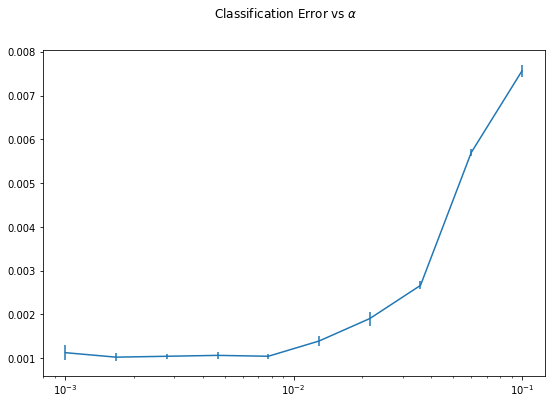

In [15]:
error_samples, alpha_list = [], np.logspace(-3, -1, 10)


for i, alpha in enumerate(alpha_list):
    errors = []
    for _ in range(10):
        clf = SGDClassifier(
                loss="log",
                max_iter=1000,
                tol=1e-3,
                penalty="l1",
                alpha=alpha,
                learning_rate="invscaling",
                power_t=0.5,
                eta0=0.01,
                verbose=1,
            )
        clf.fit(X_train, y_train)    
        errors.append(classification_error(clf, X_test, y_test))
    
    error_samples.append(errors)

fig = plt.figure(figsize=(9, 6))
fig.suptitle(r"Classification Error vs $\alpha$")
plt.errorbar(alpha_list, [np.mean(errors) for errors in error_samples], yerr=[np.std(errors) for errors in error_samples])
plt.xscale("log")
    
fig.savefig("plot_29.pdf")
fig.show()

In [16]:
print(alpha_list)
print(errors)

[0.001      0.0016681  0.00278256 0.00464159 0.00774264 0.0129155
 0.02154435 0.03593814 0.05994843 0.1       ]
[0.007790077900779008, 0.007380073800738007, 0.007585075850758507, 0.007790077900779008, 0.007380073800738007, 0.007585075850758507, 0.007585075850758507, 0.007380073800738007, 0.007585075850758507, 0.007585075850758507]


### Theta vs Alpha

-- Epoch 1
Norm: 0.60, NNZs: 455, Bias: -0.006369, T: 9902, Avg. loss: 0.030090
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 436, Bias: -0.008982, T: 19804, Avg. loss: 0.017775
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 425, Bias: -0.010695, T: 29706, Avg. loss: 0.015232
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 419, Bias: -0.012012, T: 39608, Avg. loss: 0.013858
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.74, NNZs: 413, Bias: -0.013090, T: 49510, Avg. loss: 0.012950
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.75, NNZs: 406, Bias: -0.013996, T: 59412, Avg. loss: 0.012289
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.77, NNZs: 401, Bias: -0.014790, T: 69314, Avg. loss: 0.011776
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 0.78, NNZs: 397, Bias: -0.015500, T: 79216, Avg. loss: 0.011358
Total training time: 0.20 seconds.
-- Epoch 9
Norm: 0.79, NNZs: 397, Bias: -0.016137, T: 89118, Avg. loss: 0

Norm: 1.41, NNZs: 82, Bias: 0.072794, T: 59412, Avg. loss: 0.107111
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 1.46, NNZs: 79, Bias: 0.078042, T: 69314, Avg. loss: 0.106488
Total training time: 0.21 seconds.
-- Epoch 8
Norm: 1.51, NNZs: 76, Bias: 0.082880, T: 79216, Avg. loss: 0.105872
Total training time: 0.24 seconds.
-- Epoch 9
Norm: 1.55, NNZs: 73, Bias: 0.087353, T: 89118, Avg. loss: 0.105070
Total training time: 0.27 seconds.
Convergence after 9 epochs took 0.27 seconds
-- Epoch 1
Norm: 1.00, NNZs: 85, Bias: 0.051949, T: 9902, Avg. loss: 0.182442
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.18, NNZs: 70, Bias: 0.066927, T: 19804, Avg. loss: 0.169606
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.30, NNZs: 57, Bias: 0.078171, T: 29706, Avg. loss: 0.165385
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 1.40, NNZs: 54, Bias: 0.087302, T: 39608, Avg. loss: 0.162811
Total training time: 0.12 seconds.
-- Epoch 5
Norm: 1.47, NNZs: 52, Bias: 0.095021, T: 495

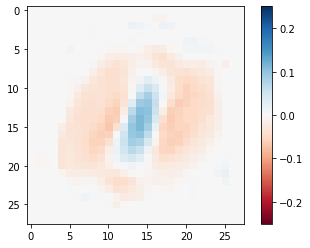

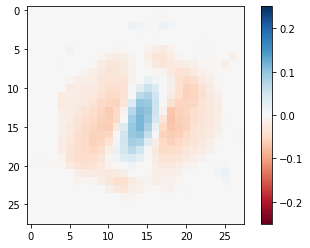

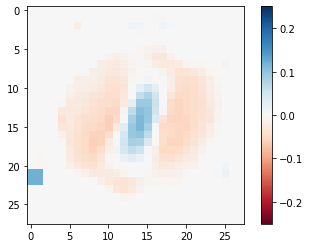

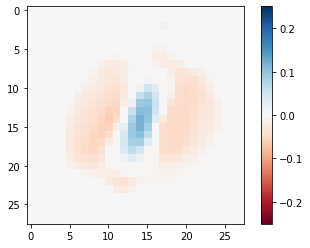

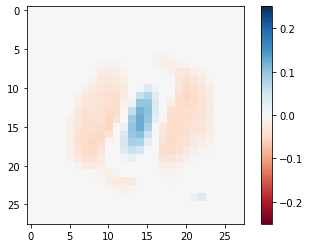

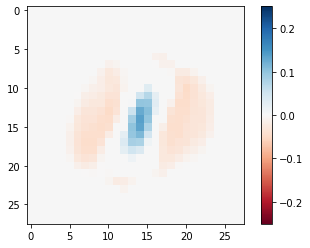

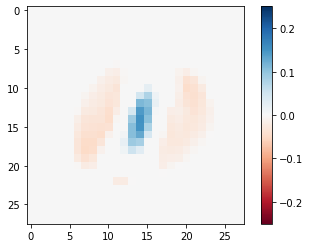

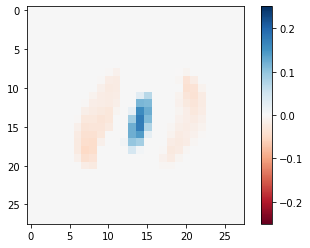

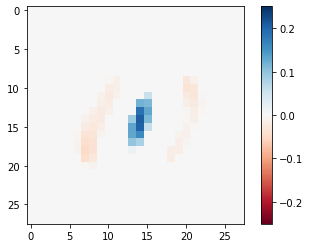

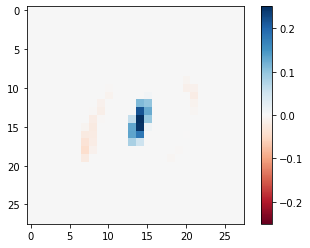

In [17]:
weights = []
for i, alpha in enumerate(alpha_list):
    clf = SGDClassifier(
                loss="log",
                max_iter=1000,
                tol=1e-3,
                penalty="l1",
                alpha=alpha,
                learning_rate="invscaling",
                power_t=0.5,
                eta0=0.01,
                verbose=1,
            )
    clf.fit(X_train, y_train)
    weights.append(clf.coef_.reshape(28,28))
    
for i, theta in enumerate(weights):
    scale = np.abs(clf.coef_).max()
    plt.imshow(theta, cmap=plt.cm.RdBu, vmax=scale, vmin=-scale)
    plt.colorbar()
    plt.savefig(f"plot_32_{i}.pdf")
    plt.show()